## Python open FASTQ form

In [1]:
'''
fastQ格式:
@SEQ_ID
 GATTTGGGGTTCAAAGCAGTATCGATCAAATAGTAAATCCATTTGTTCAACTCACAGTTT
 +
 !''((((+))%%%++)(%%%%).1-+''))**55CCF>>>>>>CCCCCCC65
 
第一行：@SEQ_ID
以@開頭，之後為序列的識別碼以及描述資訊（與FASTA格式的描述行類似） (通常是用的定序儀名稱)
第二行：GATTTGGGGTTCAA……..
為序列資訊
第三行：+
以+開頭，之後可以再次加上序列的標識及描述資訊（可選）
第四行：!”((((+))%%%++)(%%%%).1-+”))**…..
為品質得分 Quality 資訊，與第二行的序列相對應，長度必須與第二行相同，記錄定序時讀取序列的品質得分，以ASCII字元方式記錄。
'''

def readFastq(filename):
    sequences=[] #用來存放讀出的序列
    qualities=[] #用來存放讀出的quality 
    with open(filename)as fh:
        while True:
            fh.readline() #用.readline讀出第一行資料
            seq=fh.readline().rstrip() #用.readline讀出下一行資料，這行是要的序列 最用後 .rstrip()刪除不要的換行與空白
            fh.readline() #用.readline讀出再下一行資料，這行是不要的 + 那行
            qual=fh.readline().rstrip() # 用.readline讀出下一行資料，這行是要的quality 最用後 .rstrip()刪除不要的換行與空白
            if len(seq) ==0: #當讀到序列資料長度是零的時候，就表示檔案內容已經讀完了，所以執行 break
                break    
            sequences.append(seq)
            qualities.append(qual)
    return sequences, qualities

In [2]:
# quality 的代碼轉換 (ord( )與chr( )進行ASCII的數字與字母轉換)
#方便之後每次進行 Q的ASCII代碼 與 Q數值的互相轉換
def QtoPhred33(Q):
    return chr(Q+33) #將 ASCII代碼 轉為 Q數值
def Phred33ToQ(qual):
    return ord(qual)-33 #將 Q數值 轉為 ASCII代碼 

print(Phred33ToQ('!'))
print(QtoPhred33(0))

0
!


In [3]:
#用readFastq讀取檔案，並將讀出的序列與Q值分別放到 seqs與 quals兩個變數中
seqs, quals = readFastq('NTUH-1-050.DNA.noHomo.1.fq')
print(seqs[1])
print(quals[1])
print(len(seqs[1]))
print(len(quals[1]))

ACAAAGATATAAAAAAAAATCAAACATAGACACAACCAAATAAATGATAACAAAAAAAAAATCAACAAAACAAAAAGAATATTCAAATATAAATACAAAA
ah``agaVV_aaV\V`]`aVeaVahXV`h`e]V]ahVPYPcaaJbh_V`]eaVVVVa^W`VVhMVV^]H_VVaVaHS]`VLbcV]Z^V_WVVa`VVV\aV
100
100


In [4]:
#看這一行的Q都是代表多大的可信度，使用剛剛定義的函式 Phred33ToQ 將Quality符號(Phred33)轉為數字(Q)
for i in quals[1]:
    print (Phred33ToQ(i), end=",")

64,71,63,63,64,70,64,53,53,62,64,64,53,59,53,63,60,63,64,53,68,64,53,64,71,55,53,63,71,63,68,60,53,60,64,71,53,47,56,47,66,64,64,41,65,71,62,53,63,60,68,64,53,53,53,53,64,61,54,63,53,53,71,44,53,53,61,60,39,62,53,53,64,53,64,39,50,60,63,53,43,65,66,53,60,57,61,53,62,54,53,53,64,63,53,53,53,59,64,53,

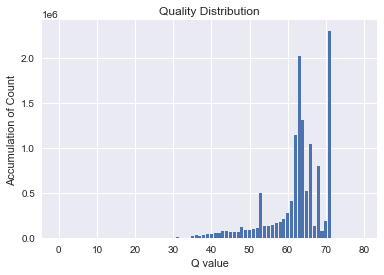

In [5]:
#利用 matplotlib 作圖 看整個fastq檔案quality分數的分布
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
%matplotlib inline

hist=[0]*80  #根據quality做一個相對應個數0的 list
for qual in quals: # 一條條讀入 剛剛讀出的 quals 內所有Q的資料
    for phred in qual: # 一個個讀出 每條quality資料的每個quality
        q= Phred33ToQ(phred) # 將每個值，用之前做的def(Phred33ToQ) 轉換為數值
        hist[q] += 1 # 計算個有各有哪些q值被讀出，看讀出的 q 是多少，增加計數到剛剛做的相對應個數0的list中

#做出bar圖
plt.bar(range(len(hist)), hist)
plt.title('Quality Distribution')
plt.xlabel('Q value')
plt.ylabel('Accumulation of Count')
plt.show()